In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# first prediction is the baseline

## to improve the model
1. Collect / Improve Data
2. Improve the model itself
3. Choose different model



In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).get_params()
 # adjustable parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# Adjusting parameters
1. manually
2. GridSearchCV - exhaustive search
3. RandomizedSearchCV
4. 


# by hand: split data into training and test sets and validation set
# Adjust parameters on validation set (practice data)
* for RandomForestClassifier 
    * `max_depth`
    * `min_samples_leaf`
    * `min_samples_split`
    * `max_features`
    * `n_estimators`
    


In [87]:
def Evaluate_P(y_true, y_preds):
        Accuracy = accuracy_score(y_true, y_preds)
        Precision = precision_score(y_true, y_preds)
        Recall = recall_score(y_true, y_preds)
        FS = f1_score(y_true, y_preds)
        metrics = {'Accuracy': round(Accuracy, 2),
                   'Precision': round(Precision, 2),
                   'Recall': round(Recall, 2),
                   'FS': round(FS, 2)}
        print(f'Accuracy: {Accuracy * 100:.2f}%', f'Precision: {Precision:.2f}', f'Recall: {Recall:.2f}', f'F1: {FS:.2f}', sep='\n')
        return metrics

In [88]:
data = pd.read_csv('ORL/pokemon_data_clean.csv')
data.drop(columns=['Unnamed: 0','Name','Type 1','Type 2'], inplace=True)
data.head()


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,0
1,2,60,62,63,80,80,60,1,0
2,3,80,82,83,100,100,80,1,0
3,3,80,100,123,122,120,80,1,0
4,4,39,52,43,60,50,65,1,0


In [89]:
np.random.seed(0)
clf = RandomForestClassifier()
data_s = data.sample(frac=1) # shuffle data

X=data_s.drop(columns=['Legendary'])
y=data_s['Legendary']

train_size = int(0.7 * len(data_s))
valid_size = int(0.15 * len(data_s))
test_size = int(0.15 * len(data_s))

X_train, y_train = X[:train_size], y[:train_size]
X_valid, y_valid = X[train_size:train_size+valid_size], y[train_size:train_size+valid_size]
X_test, y_test = X[train_size+valid_size:], y[train_size+valid_size:]

len(X_train), len(X_valid), len(X_test)



(560, 120, 120)

In [90]:
clf.fit(X_train, y_train)
y_preds = clf.predict(X_valid)
base = Evaluate_P(y_valid, y_preds)


Accuracy: 97.50%
Precision: 1.00
Recall: 0.70
F1: 0.82


In [91]:
np.random.seed(1)
clf2 = RandomForestClassifier(n_estimators=10)
clf2.fit(X_train, y_train)
y_preds = clf2.predict(X_valid)
Evaluate_P(y_valid, y_preds);


Accuracy: 97.50%
Precision: 0.89
Recall: 0.80
F1: 0.84


In [92]:
clf3 = RandomForestClassifier(max_depth=4)
clf3.fit(X_train, y_train)
y_preds = clf3.predict(X_valid)
Evaluate_P(y_valid, y_preds);

Accuracy: 96.67%
Precision: 1.00
Recall: 0.60
F1: 0.75


# using randomized search cross validation to find best parameters

In [93]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [10, 50, 100, 200, 500,1000,1200],
          'max_depth': [None, 3, 5, 10, 20],
          'min_samples_split': [2, 4, 6],
          'min_samples_leaf': [1, 2, 4],
          'max_features': ['sqrt', 'log2'],}
np.random.seed(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cf = RandomForestClassifier(n_jobs=-1) # n_jobs=-1 means use all processors
rs_clf = RandomizedSearchCV(estimator=cf,param_distributions=params,n_iter=10,cv=5,verbose=2) # n_iter is the number of models to try , verbose is how much information to display
# choose 10 random combinations of parameters from params and run 5 cross validations on each

In [1]:
6*5*3*3*2

540

In [94]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [95]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 3}

In [96]:
rs_y_preds = rs_clf.predict(X_test)
Evaluate_P(y_test, rs_y_preds);


Accuracy: 94.38%
Precision: 0.75
Recall: 0.46
F1: 0.57


# using GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
np.random.seed(1)
# brute force search
params_2 = {'n_estimators': [50, 100,1000],
                'max_depth': [None, 3, 5,10],
                'min_samples_split': [2, 4,6,8],
                'min_samples_leaf': [1],
                'max_features': ['log2','sqrt'],}

gs_clf = GridSearchCV(estimator=cf,param_grid=params_2,cv=5,verbose=2)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 1000]},
             verbose=2)

In [100]:
gs_preds = gs_clf.predict(X_test)
Evaluate_P(y_test, gs_preds);


Accuracy: 95.62%
Precision: 0.88
Recall: 0.54
F1: 0.67


Accuracy: 97.50%
Precision: 0.89
Recall: 0.80
F1: 0.84
Accuracy: 96.67%
Precision: 1.00
Recall: 0.60
F1: 0.75
Accuracy: 94.38%
Precision: 0.75
Recall: 0.46
F1: 0.57
Accuracy: 95.62%
Precision: 0.88
Recall: 0.54
F1: 0.67


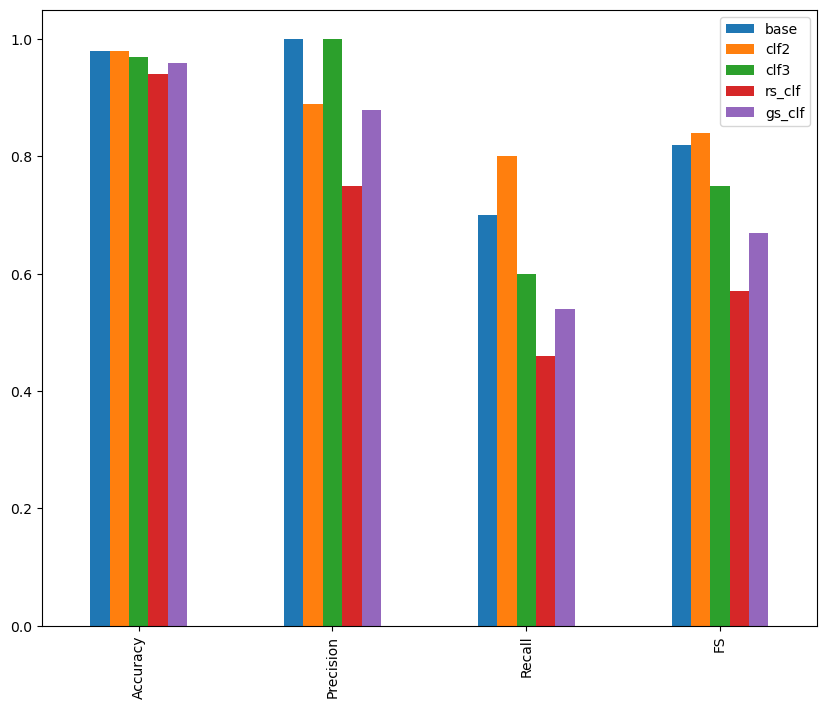

In [102]:
comparison = pd.DataFrame({'base': base,
                            'clf2': Evaluate_P(y_valid, clf2.predict(X_valid)),
                            'clf3': Evaluate_P(y_valid, clf3.predict(X_valid)),
                            'rs_clf': Evaluate_P(y_test, rs_y_preds),
                            'gs_clf': Evaluate_P(y_test, gs_preds)})
comparison.plot.bar(figsize=(10, 8));

### MAKE A METHOD TO CHECK THE BEST PARAMETERS FOR THE MODEL

##### save and load models

In [104]:
import pickle
pickle.dump(gs_clf, open('gs__model.pkl','wb'))
# load 
# gs_clf2 = pickle.load(open('gs__model.pkl','rb'))

In [106]:
#using joblib
from joblib import dump, load
dump(gs_clf, 'gs__model.joblib')
# load
gs_clf2 = load('gs__model.joblib')
# more efficient on large numpy arrays